In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('E:\\term8\\softwareeng\\project\\implementation\\Cleaned-Data.csv')
df = df[df.Country == 'Iran']
df['Gender'] = (1/6)*df['Gender_Male'] + (2/6)*df['Gender_Transgender'] + (3/6)*df['Gender_Female']
df['Contact'] = (1/6)*df['Contact_No'] + (2/6)*df['Contact_Dont-Know'] + (3/6)*df['Contact_Yes']
df['Age'] = (1/20)*df['Age_0-9'] + (2/20)*df['Age_10-19'] + (3/20)*df['Age_20-24'] + (4/20)*df['Age_25-59'] + (5/20)*df['Age_60+']
df['Severity'] = 1 - df['Severity_None']
df = df[['Gender','Contact','Age','Fever','Tiredness','Dry-Cough','Difficulty-in-Breathing','Sore-Throat',
        'Pains','Nasal-Congestion','Runny-Nose','Diarrhea','Severity']]
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 25)
temp = df_train[df['Severity'] == 0]
temp = temp.sample(12000,replace = True)
df_train = pd.concat([df_train, temp])
x_train = df_train.iloc[:,0:12]
y_train = df_train.iloc[:,12]
x_test = df_test.iloc[:,0:12]
y_test = df_test.iloc[:,12]
df.columns

E:\term6\Anaconda\setUp\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Index(['Gender', 'Contact', 'Age', 'Fever', 'Tiredness', 'Dry-Cough',
       'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'Severity'],
      dtype='object')

In [3]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train)*100)
print(clf.score(x_test, y_test)*100)

51.036311053984576
67.66098484848484


<AxesSubplot:>

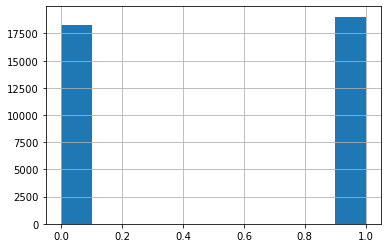

In [4]:
df_train.Severity.hist()

In [5]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.11      0.23      0.15       800
           1       0.87      0.74      0.80      5536

    accuracy                           0.68      6336
   macro avg       0.49      0.49      0.48      6336
weighted avg       0.77      0.68      0.72      6336



In [6]:
print(clf.intercept_)
clf.coef_

[0.10782725]


array([[-0.09825142, -0.0095641 ,  0.05930809,  0.00339722,  0.00774645,
        -0.01710499, -0.02973367, -0.01846501,  0.00842469, -0.04217077,
         0.01005758, -0.00174776]])

In [7]:
#input:
# Gender-> Male:1, Transgender:2, Female: 3
# Contact-> No:1, Don't-Know:2, Yes:3
# Age-> 0-9:1, 10-19:2, 20-24:3, 25-59:4, 60+:5
#Fever-> yes:1, no:0
#Tiredness-> yes:1, no:0
#Dry-cough-> yes:1, no:0
#Difficulty-in-breathing-> yes:1, no:0
#Sore-Throat-> yes:1, no:0
#Pains-> yes:1, no:0
#Nasal-Congestion-> yes:1, no:0
#Runny_Nose-> yes:1, no:0
#Diarrhea-> yes:1, no:0
#output:
#probability of being infected in scale of 0 to 100

def diagnose(features):
    arr = np.array([features]).astype('float')
    arr[0,0] = arr[0,0]/6
    arr[0,1] = arr[0,1]/6
    arr[0,2] = arr[0,2]/20
    coef = np.array([[-0.02752593,  0.03977402,  0.02206546, -0.00929782,  0.01594905,
                      -0.00560558, -0.02683619,  0.00352665, -0.00270834, -0.02176323, 
                      0.01276784, -0.00998991]])
    intercept = 1.10297915
    if np.sum(arr[0,3:11])==0 and arr[0,1] == 1/6:
        ret_value = 5.491
    elif np.sum(arr[0,3:11])==0 and arr[0,1] == 2/6:
        ret_value = 30.323
    else:
        ret_value = float(1 / (1+np.exp(-1*(intercept+np.sum(np.multiply(coef, arr))))))*100
    return np.round(ret_value,3)

In [8]:
diagnose([3,3,3,1,0,0,0,0,0,0,0,1])

74.897

In [9]:
diagnose([3,1,5,0,0,0,0,0,0,0,0,0])

5.491